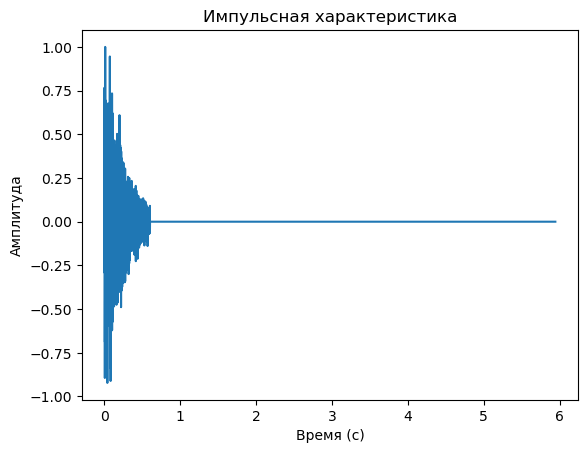

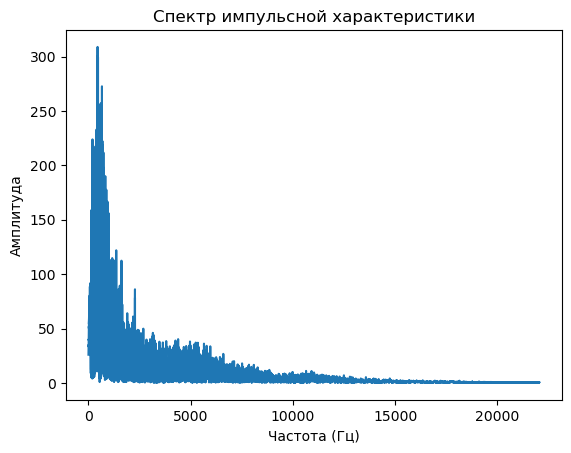

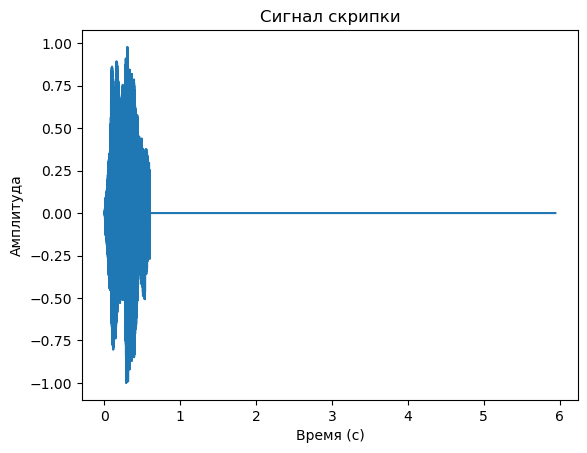

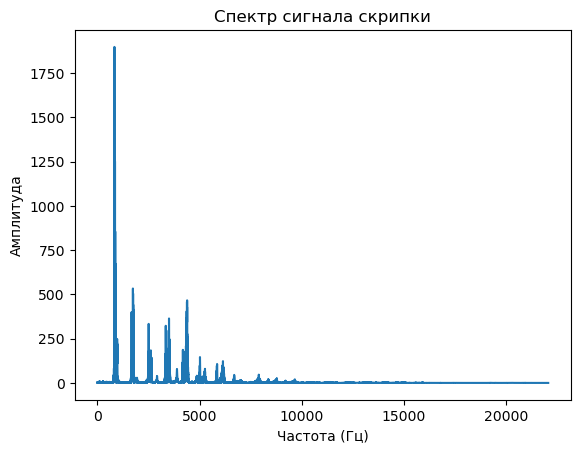

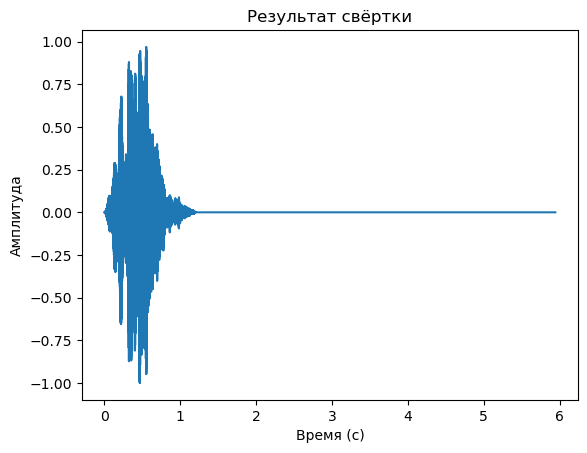

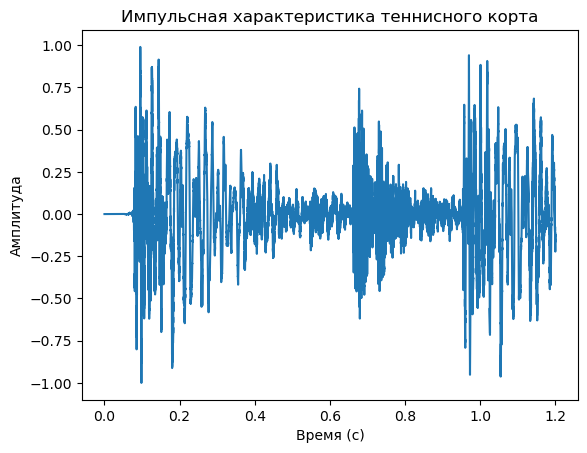

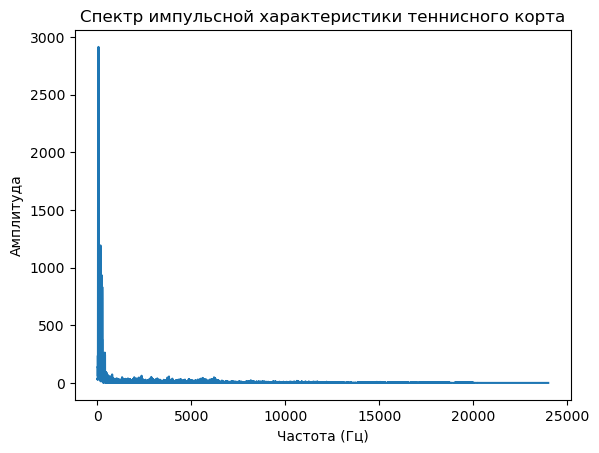

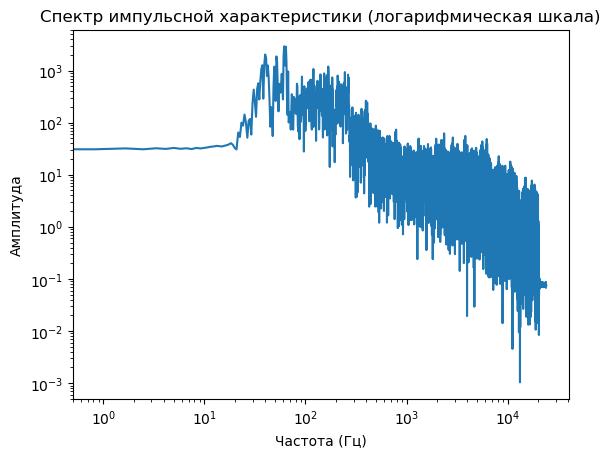

Частоты дискретизации различаются: 44100 Гц (музыка) и 48000 Гц (импульс). Приводим к общей.


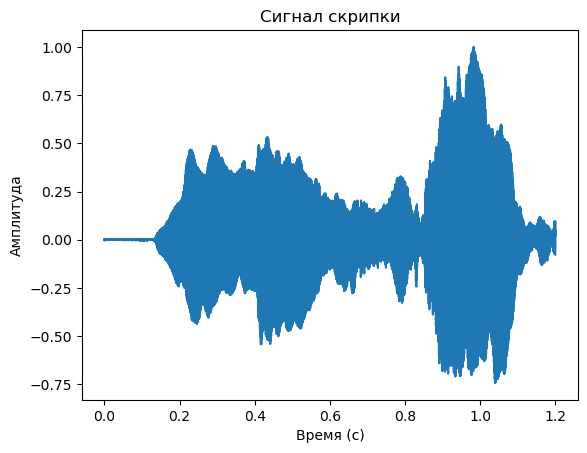

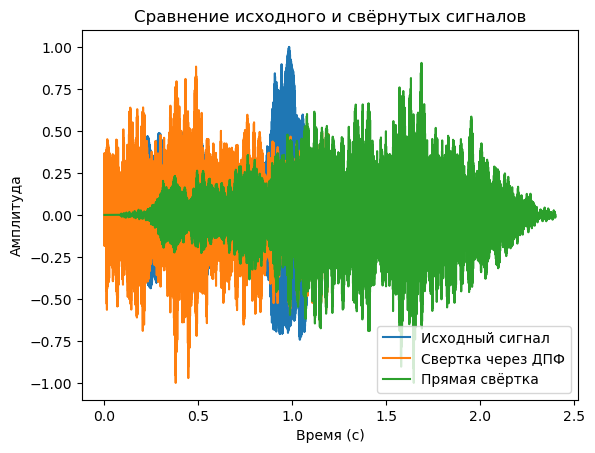

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Wave, read_wave
from scipy import signal

impulse_wave = read_wave('180960__kleeb__gunshot.wav')
start_point = 0.15
impulse_part = impulse_wave.segment(start=start_point, duration=0.6)
impulse_part.shift(-start_point)
impulse_part.truncate(2**17)
impulse_part.zero_pad(2**18)
impulse_part.normalize()
plt.plot(impulse_part.ts, impulse_part.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Импульсная характеристика')
plt.show()

impulse_freq = impulse_part.make_spectrum()
plt.plot(impulse_freq.fs, impulse_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр импульсной характеристики')
plt.show()

audio_wave = read_wave('92002__jcveliz__violin-origional.wav')
start_offset = 0.13
audio_part = audio_wave.segment(start=start_offset, duration=0.6)
audio_part.shift(-start_offset)
audio_part.truncate(2**17)
audio_part.zero_pad(2**18)
audio_part.normalize()
plt.plot(audio_part.ts, audio_part.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал скрипки')
plt.show()

audio_freq = audio_part.make_spectrum()
plt.plot(audio_freq.fs, audio_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр сигнала скрипки')
plt.show()

convolved_result = (audio_freq * impulse_freq).make_wave()
convolved_result.normalize()
plt.plot(convolved_result.ts, convolved_result.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Результат свёртки')
plt.show()

impulse_no_pad = impulse_wave.segment(start=start_point, duration=0.6)
impulse_no_pad.shift(-start_point)
impulse_no_pad.truncate(2**17)
impulse_no_pad.normalize()
impulse_freq_no_pad = impulse_no_pad.make_spectrum()

audio_no_pad = audio_wave.segment(start=start_offset, duration=0.6)
audio_no_pad.shift(-start_offset)
audio_no_pad.truncate(2**17)
audio_no_pad.normalize()
audio_freq_no_pad = audio_no_pad.make_spectrum()

result_no_pad = (audio_freq_no_pad * impulse_freq_no_pad).make_wave()
result_no_pad.normalize()

room_response = read_wave('10.1.wav')
response_length = 1.2
room_response = room_response.segment(start=0, duration=response_length)
room_response.normalize()
plt.plot(room_response.ts, room_response.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Импульсная характеристика теннисного корта')
plt.show()

room_spectrum = room_response.make_spectrum()
plt.plot(room_spectrum.fs, room_spectrum.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр импульсной характеристики теннисного корта')
plt.show()

plt.plot(room_spectrum.fs, room_spectrum.amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр импульсной характеристики (логарифмическая шкала)')
plt.show()

sound_track = read_wave('92002__jcveliz__violin-origional.wav')
if sound_track.framerate != room_response.framerate:
    print(f"Частоты дискретизации различаются: {sound_track.framerate} Гц (музыка) и {room_response.framerate} Гц (импульс). Приводим к общей.")
    sound_track.ys = signal.resample(sound_track.ys, int(len(sound_track.ys) * room_response.framerate / sound_track.framerate))
    sound_track.framerate = room_response.framerate
    sound_track.ts = np.arange(len(sound_track.ys)) / sound_track.framerate
sound_track = sound_track.segment(start=0, duration=response_length)
sound_track.normalize()
plt.plot(sound_track.ts, sound_track.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал скрипки')
plt.show()

sound_spectrum = sound_track.make_spectrum()
output_spectrum = (sound_spectrum * room_spectrum).make_wave()
output_spectrum.normalize()
output_convolve = sound_track.convolve(room_response)
output_convolve.normalize()
plt.plot(sound_track.ts, sound_track.ys, label='Исходный сигнал')
plt.plot(output_spectrum.ts, output_spectrum.ys, label='Свертка через ДПФ')
plt.plot(output_convolve.ts, output_convolve.ys, label='Прямая свёртка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и свёрнутых сигналов')
plt.legend()
plt.show()